In [1]:
import sympy as sp
from sympy import symbols, sqrt, exp, pi, init_printing, cancel, latex, simplify
init_printing(use_unicode=True)
x = symbols('x')
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

based on:  
"A Common Error Concerning Kurtosis" by Irving Kaplansky, 1945  
https://www-jstor-org.ezproxy.uio.no/stable/2280139  
scipy Kurtosis:  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html:  
*scipy.stats.kurtosis(a, axis=0, fisher=True, bias=True, nan_policy='propagate', python_star, keepdims=False)[source]*  
fisherbool, optional  
If True, Fisher’s definition is used (normal ==> 0.0). If False, Pearson’s definition is used (normal ==> 3.0).

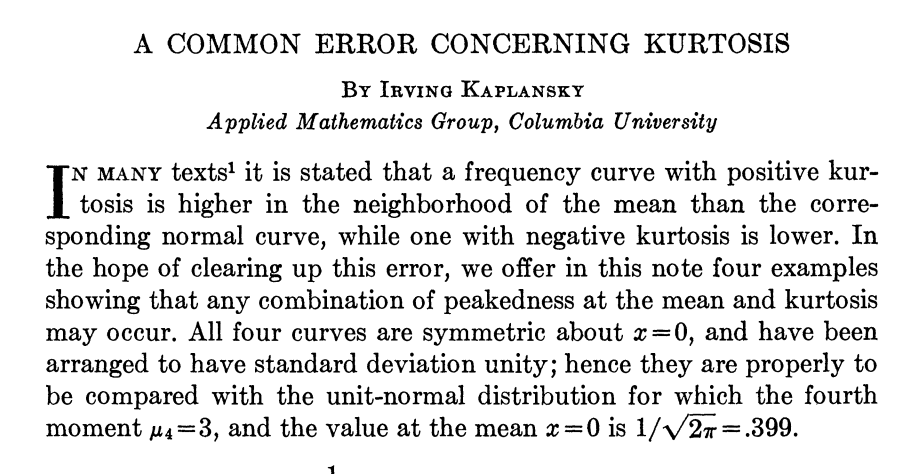

In [25]:
from IPython.display import Image
Image(filename="./common_error.png")

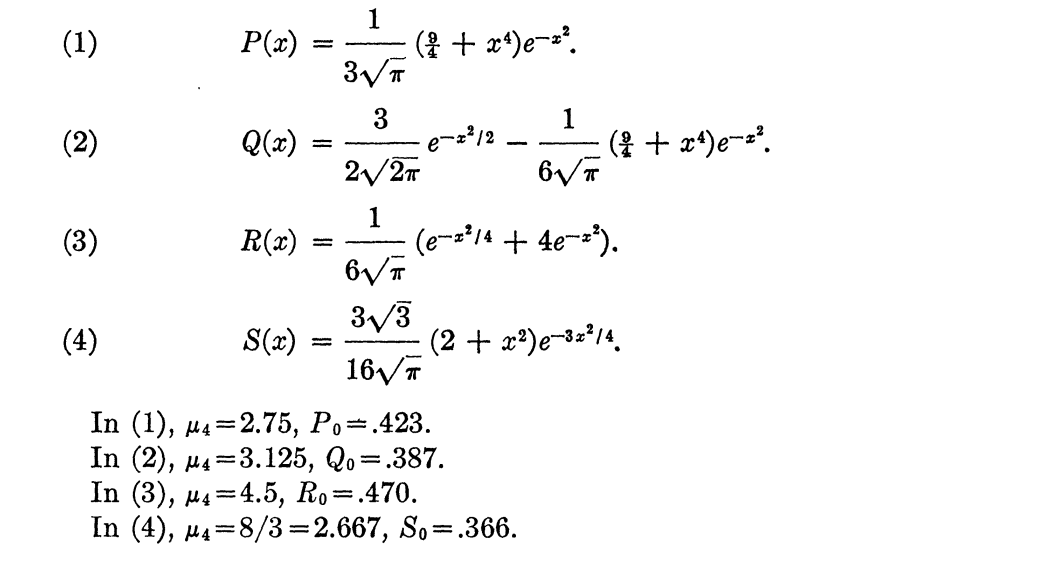

In [2]:
from IPython.display import Image
Image(filename="./kurtosis.png")

In [3]:
def print_moments(distribution_name, y_values):
    mean= np.mean(y_values)
    std = np.std(y_values)
    skewness = skew(y_values)
    kurtosis_m = kurtosis(y_values,  fisher= False)
    print(f"{distribution_name}, mean: {mean}, std: {std}, skewness: {skewness}, kurtosis: {kurtosis_m}")

In [4]:
equation_P = (1 / (3 * sqrt(pi)) * (9 / 4 + x**4) * exp(-x**2))
print("Equation:", equation_P)
equation_P

Equation: (x**4 + 2.25)*exp(-x**2)/(3*sqrt(pi))


Equation P, mean: 0.09999999996275954, std: 0.13415917221251275, skewness: 1.134221315851358, kurtosis: 2.9069766421999335


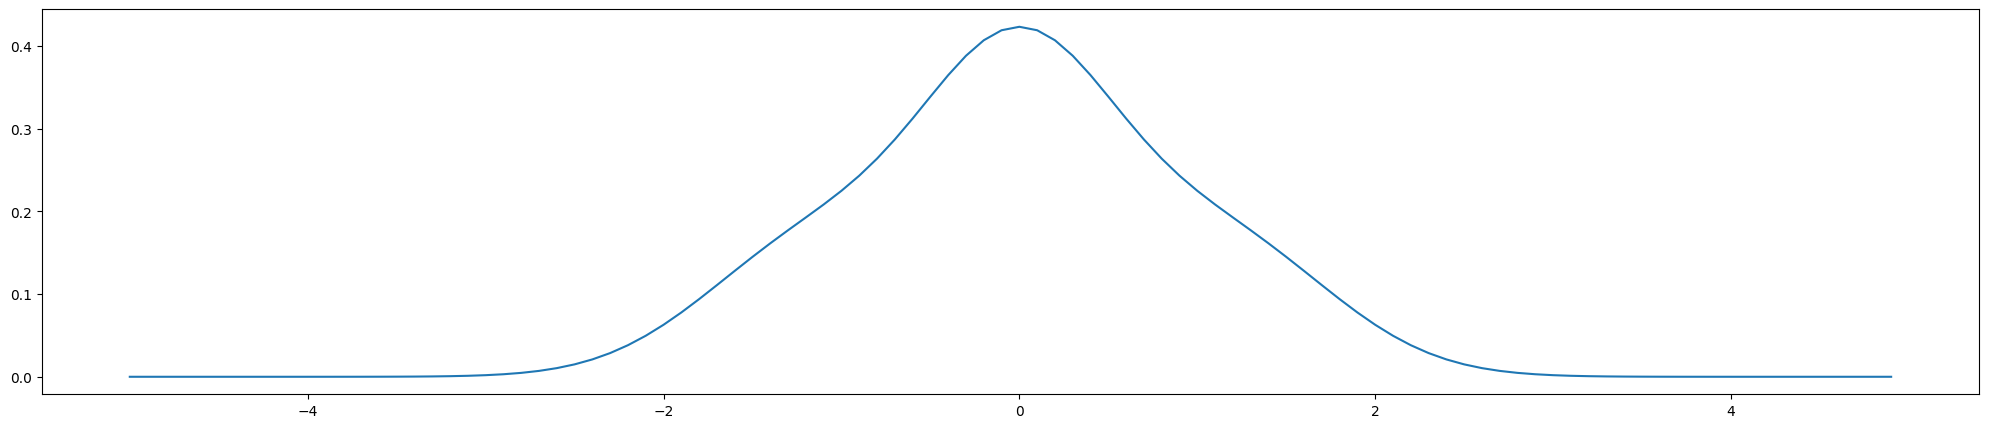

In [5]:
numpy_function = np.vectorize(lambda val: equation_P.subs(x, val).evalf())
x_values_P = np.arange(-5,5, 0.1)
y_values_P = numpy_function(x_values_P)
#convert from sympy.core.numbers.Float to numpy.float64
y_values_P =  np.array(y_values_P, dtype=np.float64)

fig, ax = plt.subplots(figsize=(25, 5))
print_moments("Equation P", y_values_P)
_= ax.plot(x_values_P, y_values_P)

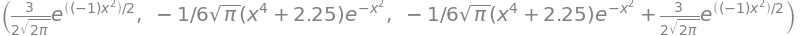

In [6]:
with sp.evaluate(False):
    part_1 = (3/(2*sqrt(2*pi)) * exp((-x**2)/2))
    part_2 =  - (1/(6*sqrt(pi)))*(9/4 + x**4)*exp(-x**2)
    equation_Q = part_1 + part_2
part_1, part_2, equation_Q

Equation Q, mean: 0.09999991217153527, std: 0.13563521442968463, skewness: 1.1054910006544008, kurtosis: 2.6154158797136997


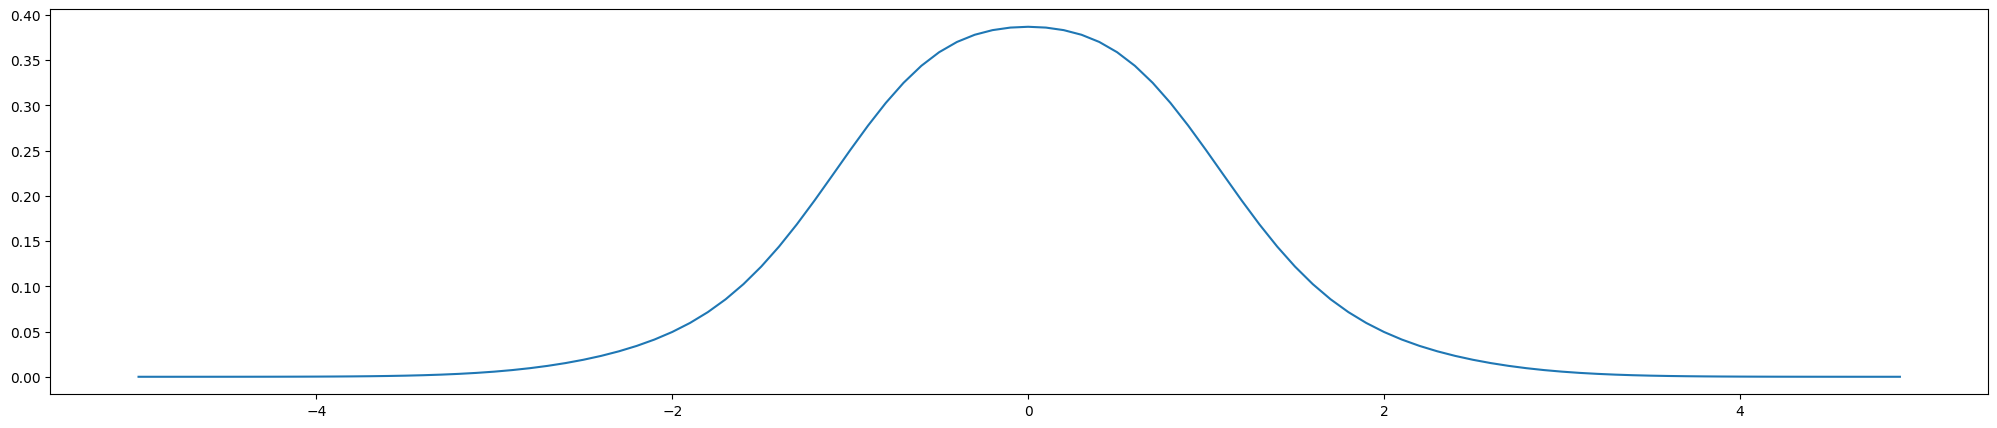

In [7]:
numpy_function = np.vectorize(lambda val: equation_Q.subs(x, val).evalf())
x_values_Q = np.arange(-5,5, 0.1)
y_values_Q = numpy_function(x_values_Q)
#convert from sympy.core.numbers.Float to numpy.float64
y_values_Q =  np.array(y_values_Q, dtype=np.float64)
fig, ax = plt.subplots(figsize=(25, 5))
print_moments("Equation Q", y_values_Q)
_ = ax.plot(x_values_Q, y_values_Q)

In [8]:
part_1 =1 / (6 * sqrt(pi)) 
part_2 = (exp(-x**2/4))
part_3 = 4 * exp(-x**2)
equation_R = part_1 *(part_2 + part_3)
part_1, part_2, part_3, equation_R
equation_R

Equation R, mean: 0.09998635935761489, std: 0.14547770614281177, skewness: 1.4379102669512598, kurtosis: 3.626235583462805


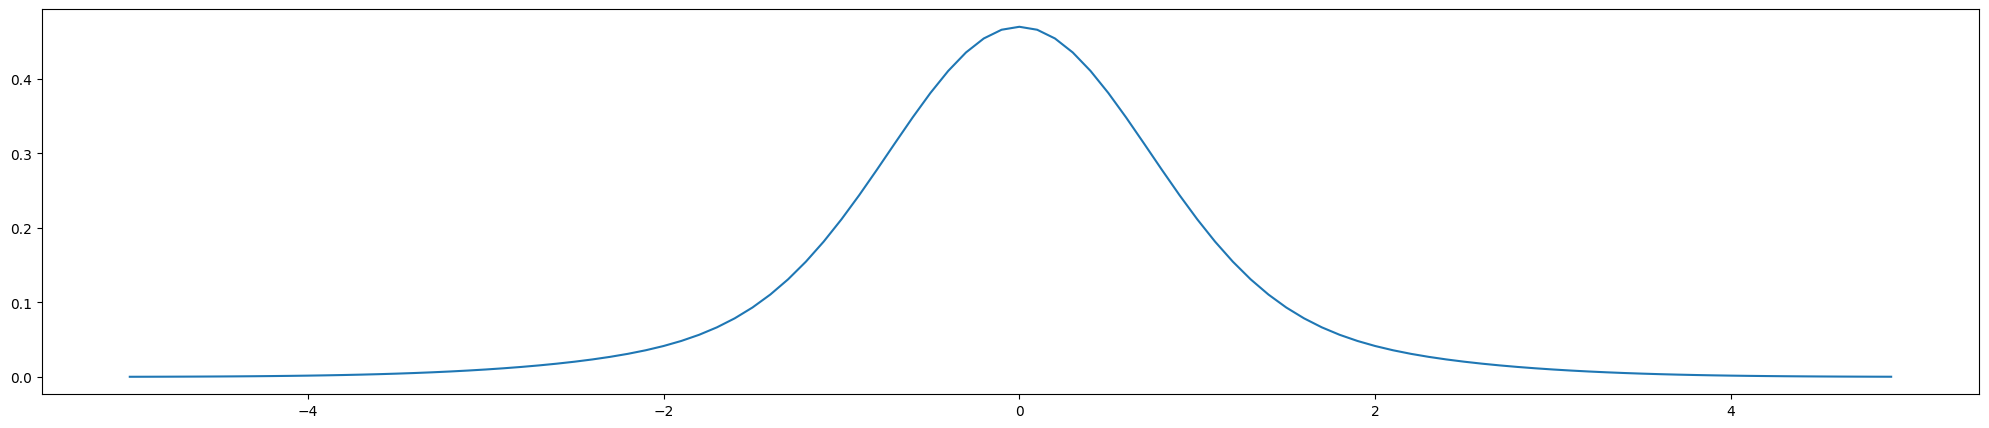

In [9]:
numpy_function = np.vectorize(lambda val: equation_R.subs(x, val).evalf())
x_values_R = np.arange(-5,5, 0.1)
y_values_R = numpy_function(x_values_R)
#convert from sympy.core.numbers.Float to numpy.float64
y_values_R =  np.array(y_values_R, dtype=np.float64)

fig, ax = plt.subplots(figsize=(25, 5))
print_moments("Equation R", y_values_R)
_ = ax.plot(x_values_R, y_values_R)

In [10]:
with sp.evaluate(False):
    equation_S = (3*sqrt(3))/(16*sqrt(pi))*(2+x**2)*exp((-3*x**2)/4)
equation_S

Equation S, mean: 0.09999999898785095, std: 0.13240681719015424, skewness: 0.9733032757751315, kurtosis: 2.3066133589610263


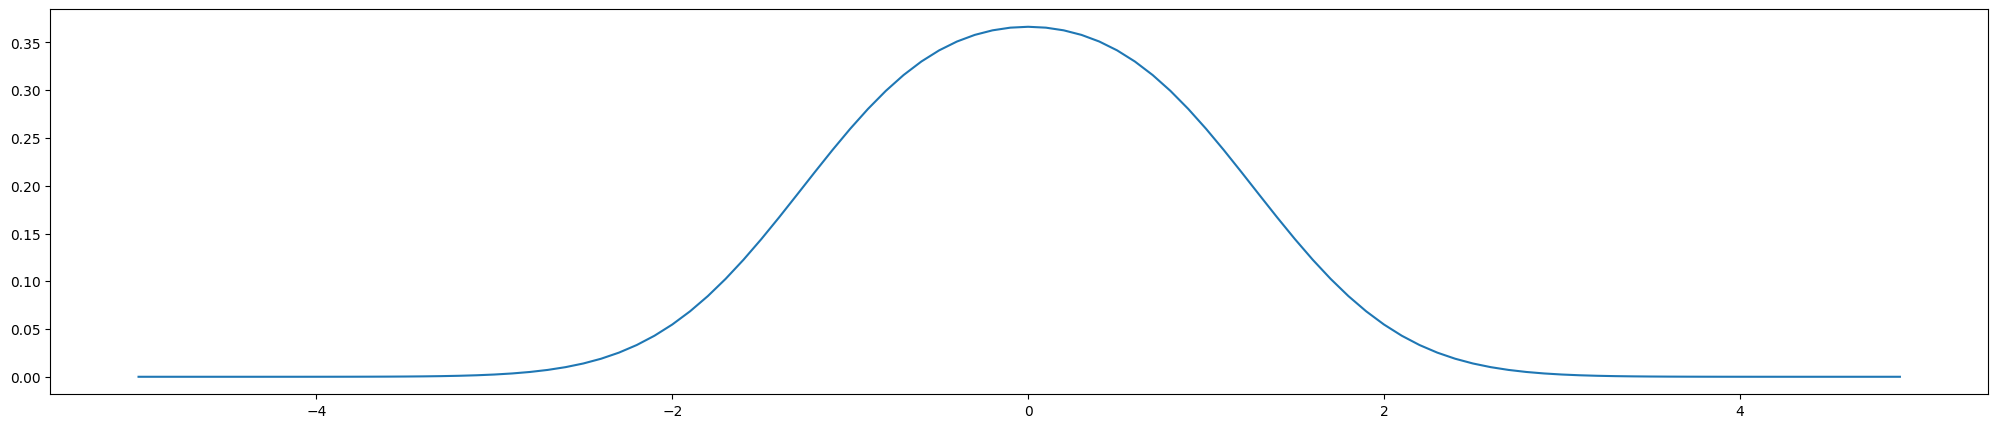

In [11]:
numpy_function = np.vectorize(lambda val: equation_S.subs(x, val).evalf())
x_values_S = np.arange(-5,5, 0.1)
y_values_S = numpy_function(x_values_S)
#convert from sympy.core.numbers.Float to numpy.float64
y_values_S =  np.array(y_values_S, dtype=np.float64)

fig, ax = plt.subplots(figsize=(25, 5))
print_moments("Equation S", y_values_S)
_ = ax.plot(x_values_S, y_values_S)

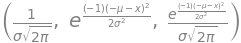

In [12]:
x, mu, sigma = symbols('x mu sigma')

# Define the normal distribution PDF
with sp.evaluate(False):
    part_1 = 1/(sqrt(2*pi) *sigma)
    part_2 = exp( (-(-x-mu)**2)/(2*sigma**2))
    gauss_distribution = part_1 * part_2
    #(2*sigma**2)
    #normal_distribution = 1 / (sigma * sqrt(2*pi)) * exp(-(x - mu)**2 / (2*sigma**2))

# Display the normal distribution
part_1, part_2, gauss_distribution

Gaussian, mean: 0.09999994143527671, std: 0.13494254662737826, skewness: 1.1093658243067464, kurtosis: 2.6892771048131436


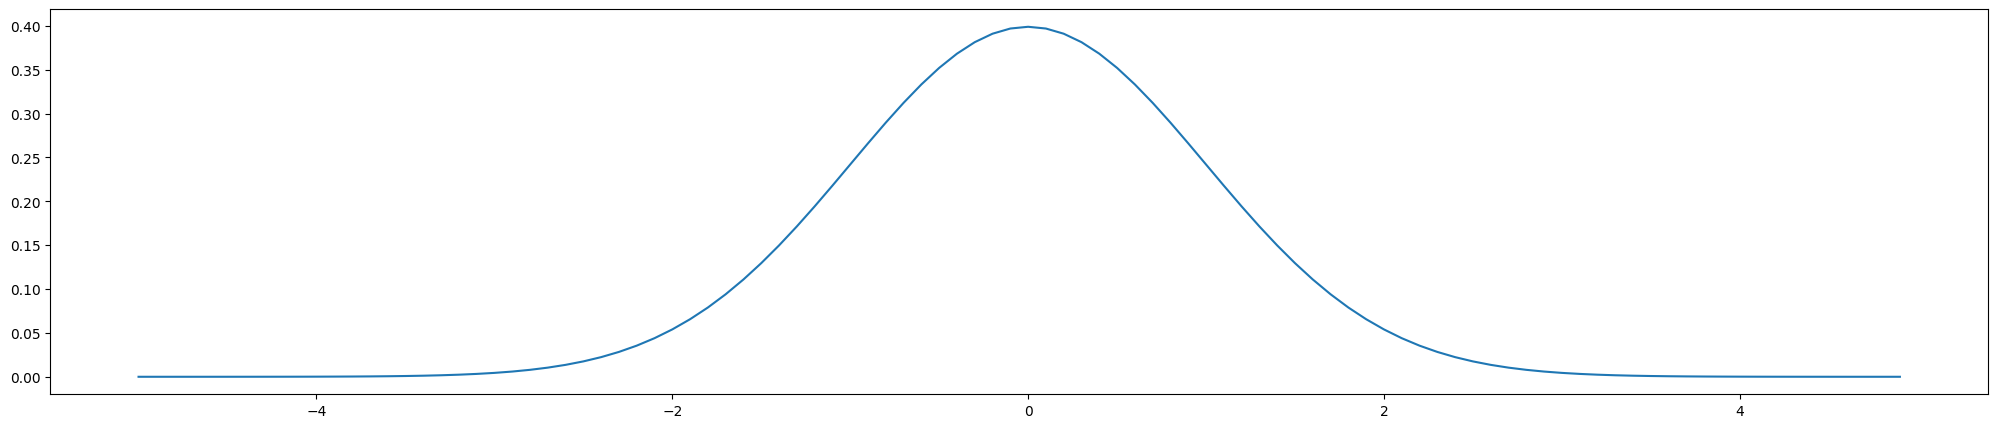

In [13]:
gauss_function = sp.lambdify((x, mu, sigma), gauss_distribution, 'numpy')
x_values_Gauss = np.arange(-5,5, 0.1)
mu_value = 0
sigma_value = 1
y_values_Gauss = gauss_function(x_values_Gauss, mu_value, sigma_value)
print_moments("Gaussian", y_values_Gauss)

fig, ax = plt.subplots(figsize=(25, 5))


_ = ax.plot(x_values_Gauss, y_values_Gauss)

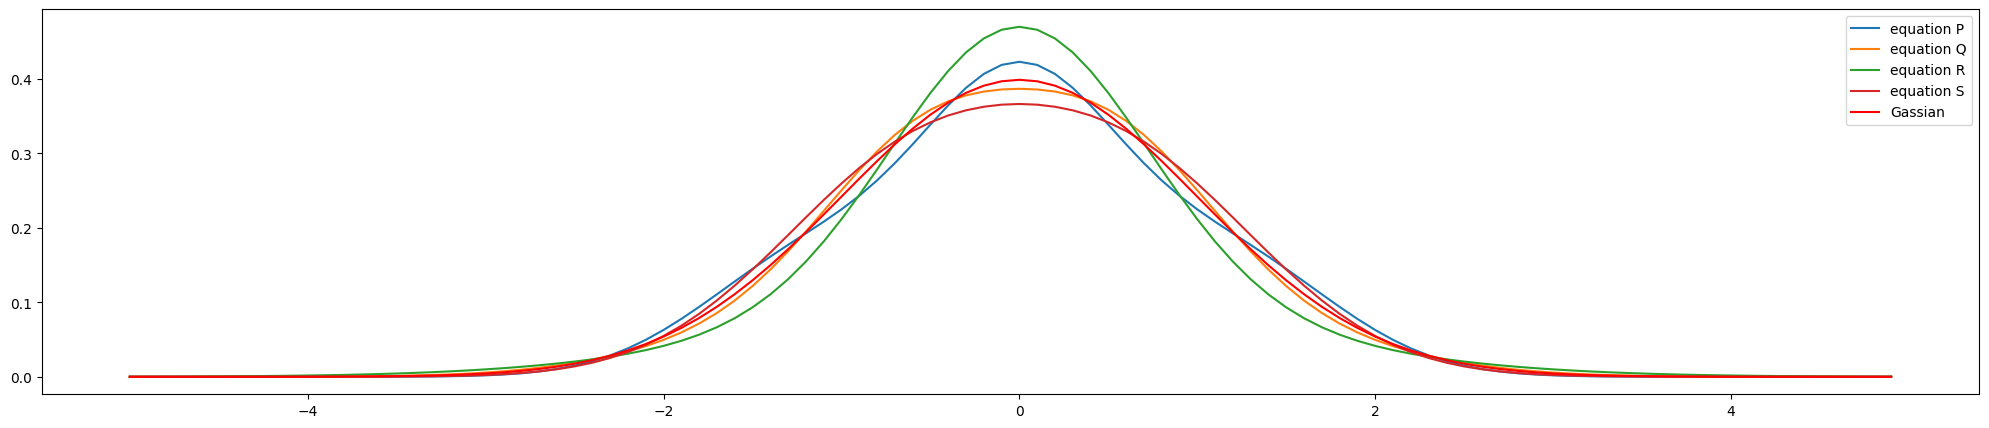

In [14]:
fig, ax = plt.subplots(figsize=(25, 5))

_= ax.plot(x_values_P, y_values_P, label = "equation P")
_ = ax.plot(x_values_Q, y_values_Q, label = "equation Q")
_ = ax.plot(x_values_R, y_values_R, label = "equation R")
_ = ax.plot(x_values_S, y_values_S, label = "equation S")
_ = ax.plot(x_values_Gauss, y_values_Gauss, color = 'red', label = "Gassian")
_= ax.legend()

In [22]:
#sorted:
print_moments("Equation S", y_values_S)
print_moments("Equation Q", y_values_Q)
print_moments("Gaussian  ", y_values_Gauss)
print_moments("Equation P", y_values_P)
print_moments("Equation R", y_values_R)



Equation S, mean: 0.09999999898785095, std: 0.13240681719015424, skewness: 0.9733032757751315, kurtosis: 2.3066133589610263
Equation Q, mean: 0.09999991217153527, std: 0.13563521442968463, skewness: 1.1054910006544008, kurtosis: 2.6154158797136997
Gaussian  , mean: 0.09999994143527671, std: 0.13494254662737826, skewness: 1.1093658243067464, kurtosis: 2.6892771048131436
Equation P, mean: 0.09999999996275954, std: 0.13415917221251275, skewness: 1.134221315851358, kurtosis: 2.9069766421999335
Equation R, mean: 0.09998635935761489, std: 0.14547770614281177, skewness: 1.4379102669512598, kurtosis: 3.626235583462805


In [16]:
print_moments("Equation P", y_values_P)
print_moments("Equation Q", y_values_Q)
print_moments("Equation R", y_values_R)
print_moments("Equation S", y_values_S)
print_moments("Gaussian  ", y_values_Gauss)

Equation P, mean: 0.09999999996275954, std: 0.13415917221251275, skewness: 1.134221315851358, kurtosis: 2.9069766421999335
Equation Q, mean: 0.09999991217153527, std: 0.13563521442968463, skewness: 1.1054910006544008, kurtosis: 2.6154158797136997
Equation R, mean: 0.09998635935761489, std: 0.14547770614281177, skewness: 1.4379102669512598, kurtosis: 3.626235583462805
Equation S, mean: 0.09999999898785095, std: 0.13240681719015424, skewness: 0.9733032757751315, kurtosis: 2.3066133589610263
Gaussian  , mean: 0.09999994143527671, std: 0.13494254662737826, skewness: 1.1093658243067464, kurtosis: 2.6892771048131436


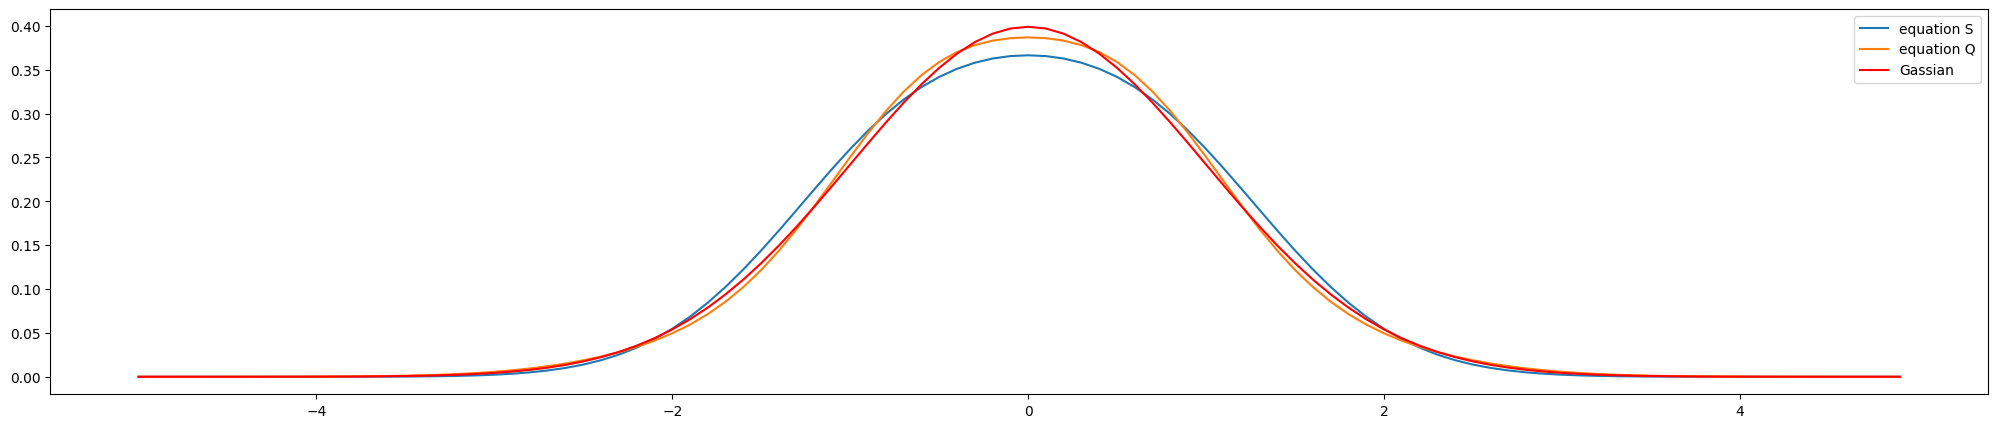

In [24]:
fig, ax = plt.subplots(figsize=(25, 5))
_ = ax.plot(x_values_S, y_values_S, label = "equation S")
_ = ax.plot(x_values_Q, y_values_Q, label = "equation Q")

#_ = ax.plot(x_values_P, y_values_P, label = "equation P")
_ = ax.plot(x_values_Gauss, y_values_Gauss, color = 'red', label = "Gassian")
_= ax.legend()

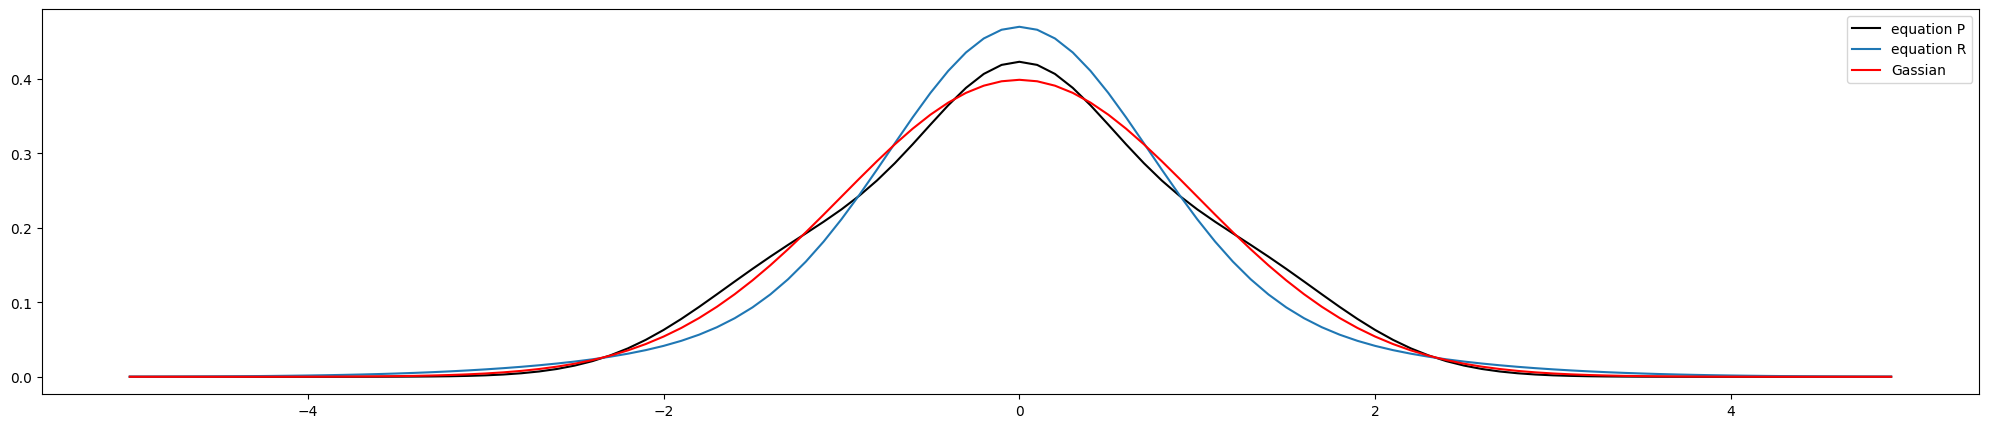

In [23]:
fig, ax = plt.subplots(figsize=(25, 5))
#_ = ax.plot(x_values_S, y_values_S, label = "equation S")
_ = ax.plot(x_values_P, y_values_P, color  = 'black',  label = "equation P")
_ = ax.plot(x_values_R, y_values_R, label = "equation R")
_ = ax.plot(x_values_Gauss, y_values_Gauss, color = 'red', label = "Gassian")
_= ax.legend()